In [6]:
import torch
import torch.nn as nn

from hvsrUNet.module.model import UNet
from hvsrUNet.module.trainer import train
from hvsrUNet.module.dataset import MkData
from hvsrUNet.toolbox.plot import plotTest, plotLoss, plotHVSR, plotModel
from hvsrUNet.toolbox.hvsrIO import saveModel, loadModel

In [7]:
mkdata = MkData()
dataset = mkdata(sampleNum=1000, layerNum=3, num_h1=20, num_h2=20, dx=0.8, depth_end=200., freqs_end=10)
train_iter, test_iter = dataset

# define model
model = nn.Sequential(
    UNet(1, 1)
    )

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [8]:
## model parameters pt file name: freqs_end, num_v1, num_v2, num_v3, num_h1, num_h2, sampleNum, num_data
#                                 10.        4.      8.      2.     20.      20.     5.         1000
#saveModel(model, optimizer, epochs, losses, '../data/10_4_8_2_20_20_5_1000.pt')
#torch.save(model, '../parameter/disp.pt')
model = torch.load('../parameter/10_4_8_2_20_20_5_1000.pth')
# model, optimizer, epochs, losses = loadModel(model, optimizer, '../data/10_4_8_2_20_20_5_1000.pt')

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#X = X_test[:30]; y = y_test[:30]
X, y = next(iter(train_iter))

y_pred = model(X)
y_pred = y_pred.detach().numpy()

NameError: name 'true_v' is not defined

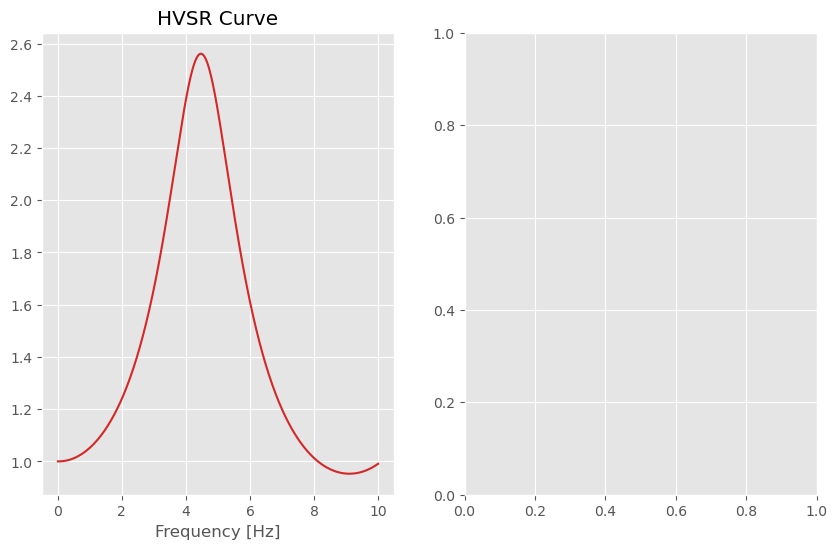

In [10]:
i = np.random.randint(0, 30)
t = np.logspace(-1.0, 1.0, 1000)

# 定义移动平均滤波器的窗口大小
window_size = 20

# 构建移动平均滤波器的系数
b = np.ones(window_size) / window_size

# 对信号进行滤波
yy = np.convolve(y_pred[i][0][0], b, mode='valid')



with plt.style.context('ggplot'):

    # 创建图形和坐标轴对象
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)

    ax1.plot(np.linspace(0, 10, 1000),X[i, 0, 0, :], label='true', color='tab:red')
    ax1.set_xlabel('Frequency [Hz]')
    #ax1.set_ylabel('Velocity [km/s]')
    ax1.set_title('HVSR Curve')
    #ax1.set_xscale('log')

    ax2.plot(true_v, depth, label='true', color='orange')
    ax2.plot(syn_v, depth, label= 'syn', color='tab:green')


    # 设置 y 轴刻度方向
    ax2.yaxis.tick_left()
    #ax.yaxis.set_label_position('top')
    ax2.set_ylabel('depth [m]')
    ax2.set_xlabel('true velocity [m/s]')
    # 设置坐标轴位置
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')

    ax2.legend(loc='lower left')
    ax2.set_title('Velocity Model')

    # 反转y轴
    ax2.invert_yaxis()

NameError: name 'true_v' is not defined

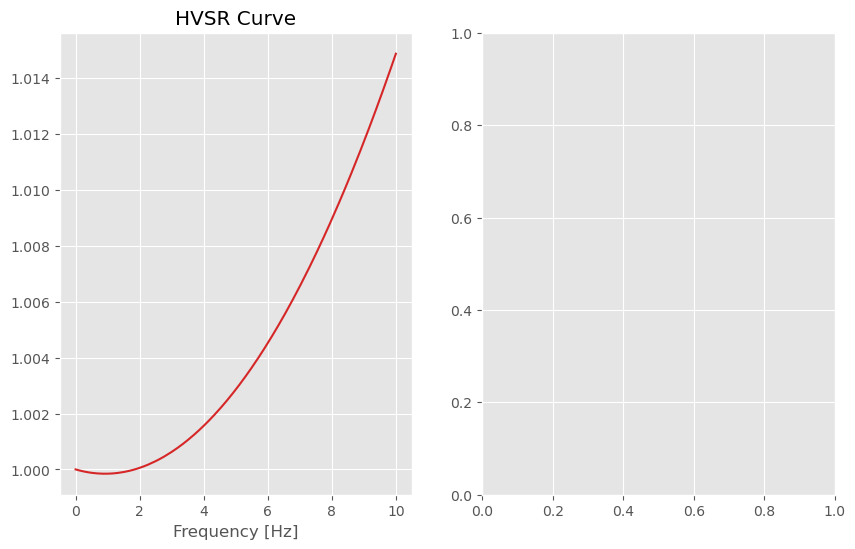

In [11]:
i = np.random.randint(0, 30)
t = np.logspace(-1.0, 1.0, 1000)

# 定义移动平均滤波器的窗口大小
window_size = 20

# 构建移动平均滤波器的系数
b = np.ones(window_size) / window_size

# 对信号进行滤波
yy = np.convolve(y_pred[i][0][0], b, mode='valid')



with plt.style.context('ggplot'):

    # 创建图形和坐标轴对象
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)

    ax1.plot(np.linspace(0, 10, 1000),X[i, 0, 0, :], label='true', color='tab:red')
    ax1.set_xlabel('Frequency [Hz]')
    #ax1.set_ylabel('Velocity [km/s]')
    ax1.set_title('HVSR Curve')
    #ax1.set_xscale('log')

    ax2.plot(true_v, depth, label='true', color='orange')
    ax2.plot(syn_v, depth, label= 'syn', color='tab:green')


    # 设置 y 轴刻度方向
    ax2.yaxis.tick_left()
    #ax.yaxis.set_label_position('top')
    ax2.set_ylabel('depth [m]')
    ax2.set_xlabel('true velocity [m/s]')
    # 设置坐标轴位置
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')

    ax2.legend(loc='lower left')
    ax2.set_title('Velocity Model')

    # 反转y轴
    ax2.invert_yaxis()

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#X = X_test[:30]; y = y_test[:30]
X, y = next(iter(train_iter))

y_pred = model(X)
y_pred = y_pred.detach().numpy()

depth_end = 200.
freqs_end = 10.

X, y = next(iter(test_iter))
yyy = model(X)
j = 11

true_v = 100*y[j][0][0].detach().numpy()
syn_v = 100*yyy[j][0][0].detach().numpy()
depth = torch.linspace(0, depth_end, len(true_v))
freq = torch.linspace(0, freqs_end, len(true_v))

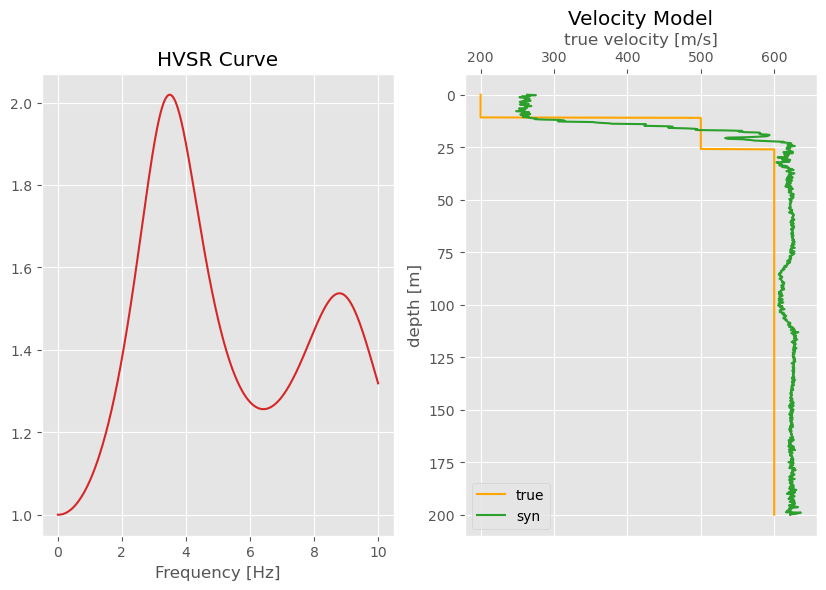

In [13]:
i = np.random.randint(0, 30)
t = np.logspace(-1.0, 1.0, 1000)

# 定义移动平均滤波器的窗口大小
window_size = 20

# 构建移动平均滤波器的系数
b = np.ones(window_size) / window_size

# 对信号进行滤波
yy = np.convolve(y_pred[i][0][0], b, mode='valid')



with plt.style.context('ggplot'):

    # 创建图形和坐标轴对象
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)

    ax1.plot(np.linspace(0, 10, 1000),X[i, 0, 0, :], label='true', color='tab:red')
    ax1.set_xlabel('Frequency [Hz]')
    #ax1.set_ylabel('Velocity [km/s]')
    ax1.set_title('HVSR Curve')
    #ax1.set_xscale('log')

    ax2.plot(true_v, depth, label='true', color='orange')
    ax2.plot(syn_v, depth, label= 'syn', color='tab:green')


    # 设置 y 轴刻度方向
    ax2.yaxis.tick_left()
    #ax.yaxis.set_label_position('top')
    ax2.set_ylabel('depth [m]')
    ax2.set_xlabel('true velocity [m/s]')
    # 设置坐标轴位置
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')

    ax2.legend(loc='lower left')
    ax2.set_title('Velocity Model')

    # 反转y轴
    ax2.invert_yaxis()